## IMPORTING LIBRARIES 

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC # "Support vector classifier"  
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart_data=pd.read_csv('heart_disease_data.csv')

# Data collection

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.shape

(303, 14)

In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


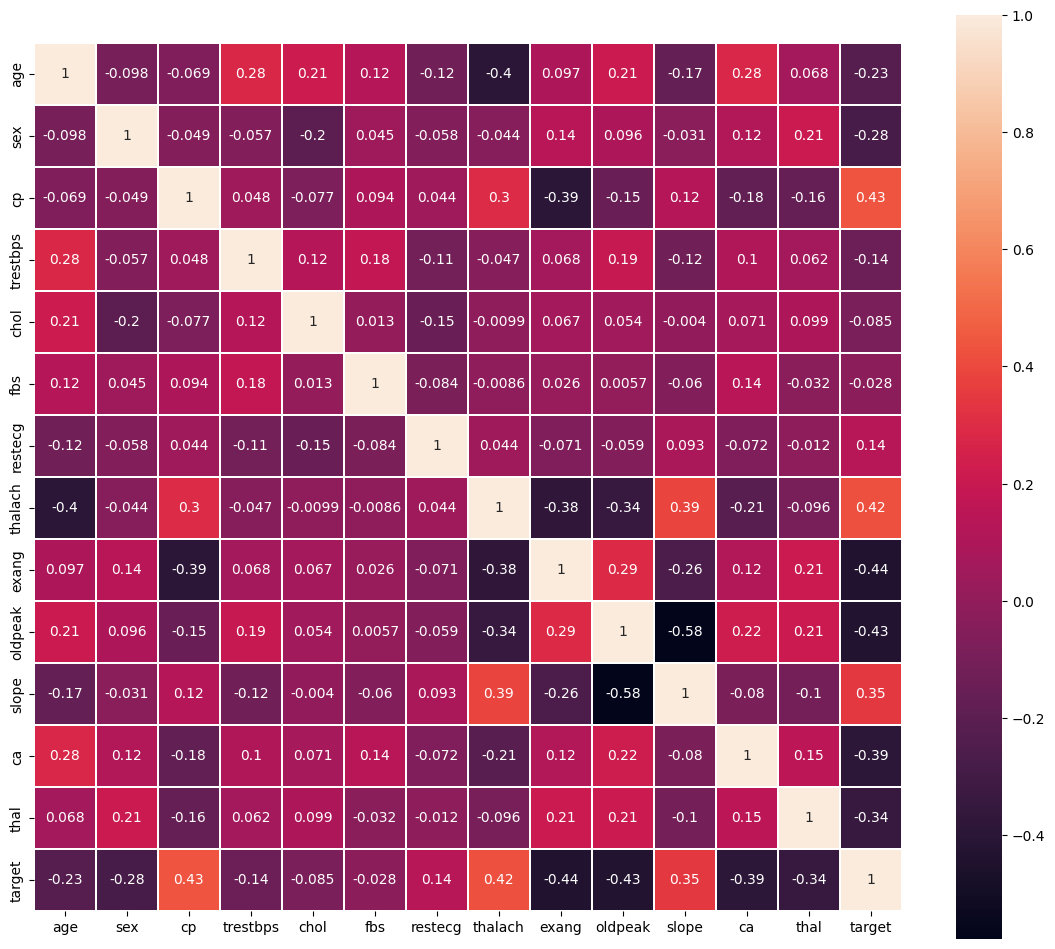

In [6]:
plt.figure(figsize=(14,12))
sns.heatmap(heart_data.astype(float).corr(),linewidths=0.1, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [7]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# Train-Test Split

In [9]:
X=heart_data.drop(columns='target',axis=1)
Y=heart_data['target']

In [10]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [11]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y, random_state=2)

In [13]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2


In [14]:
Y_train

61     1
238    0
160    1
158    1
289    0
      ..
100    1
49     1
300    0
194    0
131    1
Name: target, Length: 242, dtype: int64

In [15]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


# Feature-Scaling

In [16]:
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)


## MODEL TRAINING

In [17]:
model=LogisticRegression()
model1=KNeighborsClassifier()
model2=GaussianNB()
rf = RandomForestClassifier()
classifier = SVC(kernel='linear', random_state=0)  


In [18]:
model.fit(X_train,Y_train)

LogisticRegression()

In [19]:
Y_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(Y_train_prediction,Y_train)

In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, Y,scoring="neg_mean_squared_error", cv=10)
rmse_score=np.sqrt(-scores)
print(f"rmse_score{rmse_score}")
print(f"Mean:{scores.mean()},Standard deviation:{scores.std()}")

rmse_score[0.3592106  0.47519096 0.40160966 0.31622777 0.31622777 0.40824829
 0.40824829 0.36514837 0.54772256 0.51639778]
Mean:-0.1749462365591398,Standard deviation:0.06483442985928567


In [21]:
print(f"Accuracy:{training_data_accuracy}")

Accuracy:0.8471074380165289


In [22]:
model1.fit(X_train,Y_train)

KNeighborsClassifier()

In [23]:
Y_prediction=model1.predict(X_train)
training_data_accuracy1=accuracy_score(Y_prediction,Y_train)

In [24]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(model1, X, Y,scoring="neg_mean_squared_error", cv=10)
rmse_score1=np.sqrt(-scores1)
print(f"rmse_score1{rmse_score1}")
print(f"Mean:{scores1.mean()*-1},Standard deviation:{scores1.std()}")
print(f"Accuracy:{training_data_accuracy1}")

rmse_score1[0.53881591 0.56796183 0.67202151 0.60553007 0.60553007 0.65828059
 0.48304589 0.54772256 0.68313005 0.48304589]
Mean:0.34645161290322585,Standard deviation:0.08083676164100666
Accuracy:0.8677685950413223


In [25]:
model2.fit(X_train,Y_train)

GaussianNB()

In [26]:
Y2_prediction=model2.predict(X_train)
training_data_accuracy2=accuracy_score(Y2_prediction,Y_train)

In [27]:
print(f"Accuracy:{training_data_accuracy2}")

Accuracy:0.8471074380165289


In [28]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(Y_train,Y2_prediction)

In [29]:
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(model2, X, Y,scoring="neg_mean_squared_error", cv=10)
rmse_score2=np.sqrt(-scores2)
print(f"rmse_score:{rmse_score2}")
print(f"Mean:{scores2.mean()},Standard deviation:{scores2.std()}")
print(f"Accuracy:{training_data_accuracy2}")

rmse_score:[0.43994135 0.43994135 0.3592106  0.31622777 0.4472136  0.51639778
 0.31622777 0.4472136  0.51639778 0.54772256]
Mean:-0.19494623655913978,Standard deviation:0.06614616440373146
Accuracy:0.8471074380165289


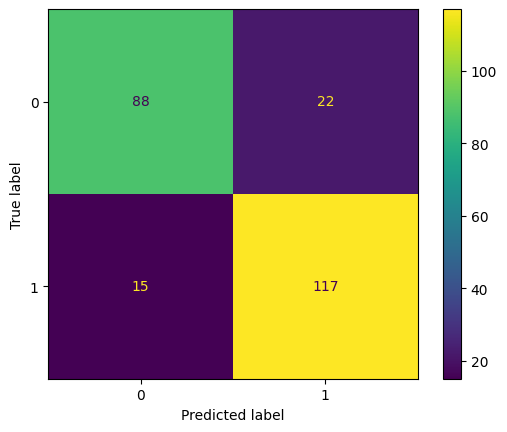

In [30]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [31]:
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [32]:
from sklearn.model_selection import cross_val_score
scores3 = cross_val_score(rf, X, Y,scoring="neg_mean_squared_error", cv=10)
rmse_score3=np.sqrt(-scores3)
print(f"rmse_score3:{rmse_score3}")
print(f"Mean:{scores3.mean()},Standard deviation:{scores3.std()}")

rmse_score3:[0.31108551 0.43994135 0.3592106  0.31622777 0.31622777 0.4472136
 0.48304589 0.40824829 0.48304589 0.4472136 ]
Mean:-0.16526881720430106,Standard deviation:0.05196575177124945


In [33]:
Y3_prediction=rf.predict(X_train)
training_data_accuracy3=accuracy_score(Y3_prediction,Y_train)

In [34]:
print(f"Accuracy:{training_data_accuracy3}")

Accuracy:1.0


In [35]:
classifier.fit(X_train, Y_train)  

SVC(kernel='linear', random_state=0)

In [36]:
from sklearn.model_selection import cross_val_score
scores4 = cross_val_score(classifier, X, Y,scoring="neg_mean_squared_error", cv=10)
rmse_score4=np.sqrt(-scores4)
print(f"rmse_score:{rmse_score4}")
print(f"Mean:{scores4.mean()},Standard deviation:{scores4.std()}")


rmse_score:[0.3592106  0.43994135 0.3592106  0.31622777 0.31622777 0.48304589
 0.25819889 0.40824829 0.51639778 0.51639778]
Mean:-0.16516129032258062,Standard deviation:0.06845874383079907


In [37]:
Y4_prediction=classifier.predict(X_train)
training_data_accuracy4=accuracy_score(Y4_prediction,Y_train)
print(f"Accuracy:{training_data_accuracy4}")

Accuracy:0.859504132231405


#  Cross-Validation

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [39]:
'''classification_models = []
classification_models.append(('Logistic Regression',LogisticRegression()))
classification_models.append(('K Nearest Neighbor', KNeighborsClassifier()))
classification_models.append(('Kernel SVM', SVC(kernel='linear', random_state=0) ))
classification_models.append(('Naive Bayes', GaussianNB()))
classification_models.append(('Random Forest', RandomForestClassifier()))

for name, model in classification_models:
    kfold = KFold(n_splits=10, random_state=None)
    result = cross_val_score(rf, X, Y, cv=kfold, scoring='accuracy')
  
 
    
print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100, result.std()*100))'''


'classification_models = []\nclassification_models.append((\'Logistic Regression\',LogisticRegression()))\nclassification_models.append((\'K Nearest Neighbor\', KNeighborsClassifier()))\nclassification_models.append((\'Kernel SVM\', SVC(kernel=\'linear\', random_state=0) ))\nclassification_models.append((\'Naive Bayes\', GaussianNB()))\nclassification_models.append((\'Random Forest\', RandomForestClassifier()))\n\nfor name, model in classification_models:\n    kfold = KFold(n_splits=10, random_state=None)\n    result = cross_val_score(rf, X, Y, cv=kfold, scoring=\'accuracy\')\n  \n \n    \nprint("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100, result.std()*100))'

#  Model Testing

 {model:LogisticRegression ,model1:KNN, model2:GaussianNB, rf:RandomForestClassifier,classifier:SVC}

In [40]:
input_data1=(41,0,1,130,204,0,0,172,0,1.4,2,0,2)
scala1=np.asarray(input_data1)
scala_reshape1=scala1.reshape(1,-1)
prediction1=model.predict(scala_reshape1)

In [41]:
if(prediction1==1):
    print("Bad Heart Health")
elif(prediction1==0):
    print("Good heart Health")

Bad Heart Health


In [42]:
Y_predict_test=model1.predict(X_test)
mse=mean_squared_error(Y_predict_test,Y_test)
rmse=np.sqrt(mse)
print(mse)

0.18032786885245902


# Deployment 

In [43]:
from joblib import dump,load
dump(model1,'model.joblib')

['model.joblib']

In [44]:
import pickle
pickle_out = open("model.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

# 